In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the metadata CSV file
metadata_df = pd.read_csv("./dicom_metadata.csv")

In [4]:
# Display basic info
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          981 non-null    object 
 1   StudyInstanceUID   981 non-null    object 
 2   SeriesInstanceUID  981 non-null    object 
 3   NumberOfSlices     981 non-null    int64  
 4   SliceThickness     981 non-null    float64
 5   PixelSpacing       981 non-null    object 
 6   StudyDate          981 non-null    int64  
 7   AcquisitionDate    981 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 61.4+ KB


In [5]:
metadata_df.head()

,PatientID,StudyInstanceUID,SeriesInstanceUID,NumberOfSlices,SliceThickness,PixelSpacing,StudyDate,AcquisitionDate
0,LIDC-IDRI-0401,1.3.6.1.4.1.14519.5.2.1.6279.6001.344370459068...,1.3.6.1.4.1.14519.5.2.1.6279.6001.120196332569...,5,2.50,"[0.761719, 0.761719]",20000101,20000101
1,LIDC-IDRI-0401,1.3.6.1.4.1.14519.5.2.1.6279.6001.344370459068...,1.3.6.1.4.1.14519.5.2.1.6279.6001.120196332569...,11,2.50,"[0.761719, 0.761719]",20000101,20000101
2,LIDC-IDRI-0401,1.3.6.1.4.1.14519.5.2.1.6279.6001.344370459068...,1.3.6.1.4.1.14519.5.2.1.6279.6001.120196332569...,39,2.50,"[0.761719, 0.761719]",20000101,20000101
3,LIDC-IDRI-0403,1.3.6.1.4.1.14519.5.2.1.6279.6001.303407883137...,1.3.6.1.4.1.14519.5.2.1.6279.6001.952265563663...,129,1.25,"[0.49609375, 0.49609375]",20000101,20000101
4,LIDC-IDRI-0403,1.3.6.1.4.1.14519.5.2.1.6279.6001.303407883137...,1.3.6.1.4.1.14519.5.2.1.6279.6001.952265563663...,101,1.25,"[0.49609375, 0.49609375]",20000101,20000101


In [6]:
# 1. Summary Statistics
# Total number of studies
total_studies = metadata_df["StudyInstanceUID"].nunique()
print(f"Total number of studies: {total_studies}")

Total number of studies: 5


In [11]:
# Total number of distinct patients
total_patients = metadata_df["PatientID"].nunique()
print(f"Total number of distinct patients: {total_patients}")

Total number of distinct patients: 5


In [7]:
# Total slices across all scans
total_slices = metadata_df["NumberOfSlices"].sum()
print(f"Total slices across all scans: {total_slices}")

Total slices across all scans: 128018


In [8]:
# Average number of slices per study
avg_slices_per_study = metadata_df.groupby("StudyInstanceUID")["NumberOfSlices"].mean().mean()
print(f"Average number of slices per study: {avg_slices_per_study:.2f}")

Average number of slices per study: 102.60


In [9]:
# Distribution of slice thickness
slice_thickness_mean = metadata_df["SliceThickness"].mean()
slice_thickness_median = metadata_df["SliceThickness"].median()
print(f"Slice Thickness - Mean: {slice_thickness_mean:.2f}, Median: {slice_thickness_median:.2f}")

Slice Thickness - Mean: 1.61, Median: 1.25


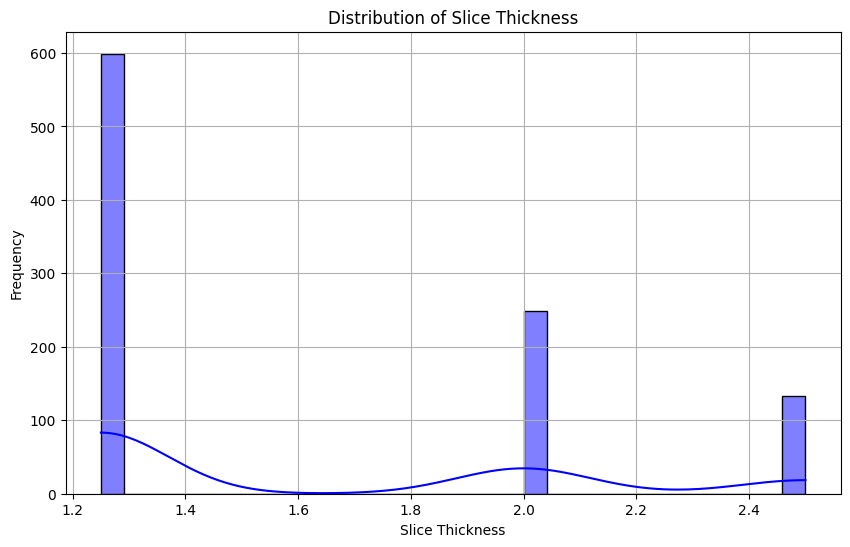

In [10]:
# Histogram of Slice Thickness
plt.figure(figsize=(10, 6))
sns.histplot(metadata_df["SliceThickness"].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribution of Slice Thickness")
plt.xlabel("Slice Thickness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

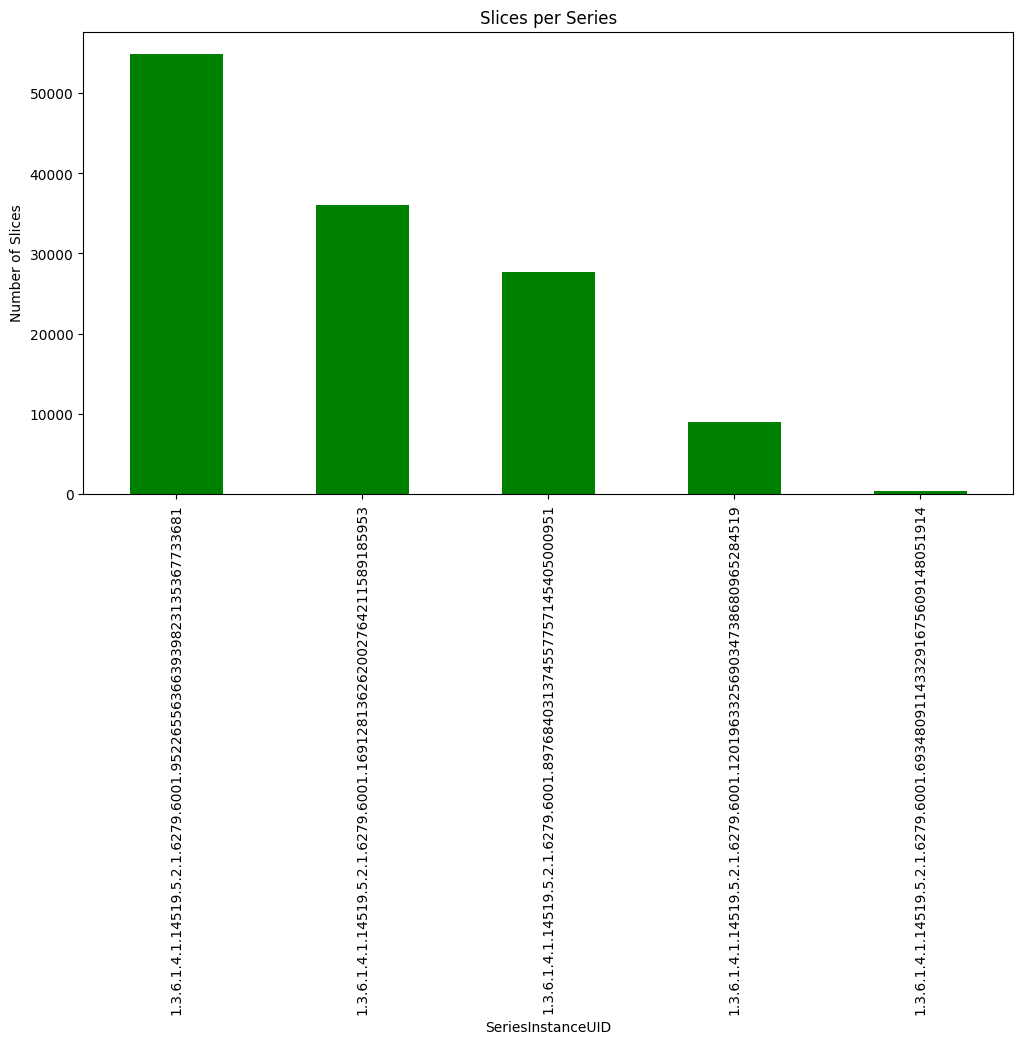

In [12]:
# Bar chart showing slices per series
slices_per_series = metadata_df.groupby("SeriesInstanceUID")["NumberOfSlices"].sum()
plt.figure(figsize=(12, 6))
slices_per_series.sort_values(ascending=False).head(20).plot(kind='bar', color='green')
plt.title("Slices per Series")
plt.xlabel("SeriesInstanceUID")
plt.ylabel("Number of Slices")
plt.xticks(rotation=90)
plt.show()